<a href="https://colab.research.google.com/github/jbcamacho/ML_projects/blob/main/analyzing_120_years_of_olympic_history.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('zerotopandas-course-project-starter-2b4c3')
jovian.set_colab_id('1eeyv2kYqyh_x97iPky-JkKsp0-EsWDq8')

# Analyzing 120 years of Olympic history: from Athens 1896 to Rio 2016

In this project, we will analyze and explore 120 years of Olympic Games data. The dataset is divided into two files. The first file `athlete_events.csv` contains 271,116 rows and 15 columns: ID, Name, Sex, Age,	Height,	Weight,	Team,	NOC,	Games, Year,	Season,	City,	Sport, Event, and	Medal. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). It contains both information about summer and winter games. The second file `noc_regions.csv` contains 230 rows and 3 columns: NOC, region, and notes. The dataset was downloaded from Kaggle and the original analysis can be found in: [120 years of Olympic history: athletes and results](https://www.kaggle.com/code/heesoo37/olympic-history-data-a-thorough-analysis/report).

The analysis will have four steps:
- Data preparation and cleaning: We will be removing outliers and filling up the Nan values.
- Exploratory Analysis and Visualization: We will be exploring the dataset and its composition.
- Asking and Answering Questions: We will ask some interesting questions about the dataset and extract some inferences.
- Inferences and Conclusion: We will summarize the key inferences obtained from the previous steps.

Additionally, in the last section *References and Future Work*, we'll be discussing future analyses and work with this dataset.

## Downloading the Dataset

First, we are going to download the dataset using the [`opendatasets`](https://github.com/JovianML/opendatasets#opendatasets) library. The `opendatasets` is a library for downloading datasets from [Kaggle](https://www.kaggle.com/). Kaggle is a website and community where you can find thousands of datasets for data science projects.

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results' 
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jbcamacho
Your Kaggle Key: ··········


100%|██████████| 5.43M/5.43M [00:00<00:00, 116MB/s]

Up to this point, the dataset has been downloaded and extracted. Let's list the files within the dataset.

In [ ]:
import os
data_dir = './120-years-of-olympic-history-athletes-and-results'
os.listdir(data_dir)

['noc_regions.csv', 'athlete_events.csv']

Let us save and upload our work to Jovian before continuing.

In [ ]:
project_name = "Analyzing-120-years-of-Olympic-history" # change this (use lowercase letters and hyphens only)

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/jbcamacho01/analyzing-120-years-of-olympic-history


'https://jovian.ai/jbcamacho01/analyzing-120-years-of-olympic-history'

## Data Preparation and Cleaning

For our analysis, we are going to use the file `athlete_events.csv`, which was downloaded from Kaggle. We need to prepare our data by replacing all the Nan values by a corresponding valid value. Also, we need to convert our data frame into a data series by re-indexing our data using the year column.



In [ ]:
import pandas as pd

In [ ]:
data_path = "/content/120-years-of-olympic-history-athletes-and-results/athlete_events.csv"
data_df = pd.read_csv(data_path)

In [ ]:
data_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
data_df["Year"] = pd.to_datetime(data_df["Year"], format="%Y")
data_df.set_index("Year", inplace=True)

In [ ]:
data_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal
Year,,,,,,,,,,,,,,
1992-01-01,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2012-01-01,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
1920-01-01,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,Summer,Antwerpen,Football,Football Men's Football,NaN
1900-01-01,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1988-01-01,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 271116 entries, 1992-01-01 to 2002-01-01
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Season  271116 non-null  object 
 10  City    271116 non-null  object 
 11  Sport   271116 non-null  object 
 12  Event   271116 non-null  object 
 13  Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 31.0+ MB


In [ ]:
data_df.drop(columns=["ID"]).describe()

,Age,Height,Weight
count,261642.000000,210945.000000,208241.000000
mean,25.556898,175.338970,70.702393
std,6.393561,10.518462,14.348020
min,10.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,97.000000,226.000000,214.000000


We do not want to check the stats for the ID column, so we dropped it.

Let's check what columns and how many missing values we have on our data frame.



In [ ]:
data_df.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

Let's start filling our Nan values in the Age column. But, first, let's explore how the data is distributed.

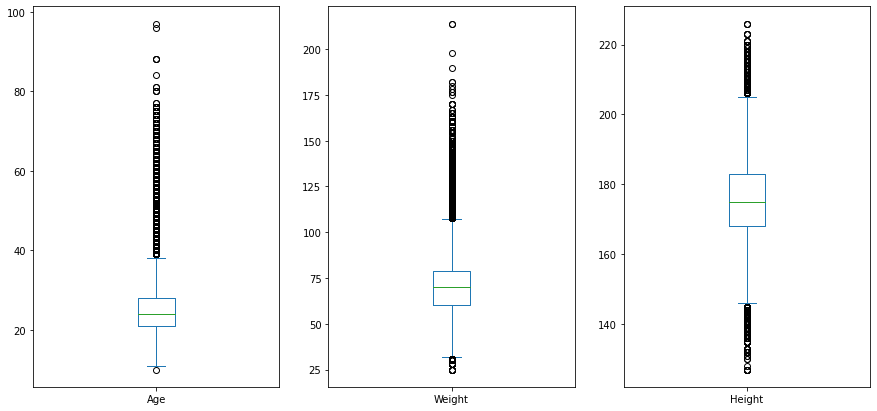

In [ ]:
data_df[["Age", "Weight", "Height"]].plot.box(subplots=True, figsize=(15, 7));

It doesn't seem right to fill the Nan values with the mean of its corresponding category. For example, there is no way that the mean weight of a wrestler is the same as the mean of a cycler.

Let's fill the Nan values under the assumption that the sport category matters the most.

In [ ]:
gp_sport_df = data_df.drop(columns=["ID"]).groupby("Sport").mean()
for sport in gp_sport_df.index:
  sport_mean_age = int(gp_sport_df.at[sport, "Age"])
  sport_mean_weight = gp_sport_df.at[sport, "Weight"]
  sport_mean_height = gp_sport_df.at[sport, "Height"]
  data_df.loc[(data_df["Age"].isna()) & (data_df["Sport"] == sport), "Age"] = sport_mean_age
  data_df.loc[(data_df["Weight"].isna()) & (data_df["Sport"] == sport), "Weight"] = sport_mean_weight
  data_df.loc[(data_df["Height"].isna()) & (data_df["Sport"] == sport), "Height"] = sport_mean_height

Now let's check if all of our Nan values are gone.

In [ ]:
data_df.isna().sum()

ID             0
Name           0
Sex            0
Age            0
Height        99
Weight       217
Team           0
NOC            0
Games          0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

Oops! There seems to be some Nan values remaining in Height and Weight column. Why?

In [ ]:
gp_sport_df[gp_sport_df[["Height", "Weight"]].isna().any(axis=1)]

,Age,Height,Weight
Sport,,,
Aeronautics,26.000000,NaN,NaN
Alpinism,38.812500,NaN,NaN
Basque Pelota,26.000000,NaN,NaN
Cricket,29.333333,NaN,NaN
Croquet,33.733333,NaN,NaN
Jeu De Paume,32.454545,178.5,NaN
Military Ski Patrol,23.736842,NaN,NaN
Polo,35.333333,175.5,NaN
Racquets,28.666667,176.0,NaN


There are some sports that do not have any register for height and weight. Let's replace those values for the mean of the height and weight.

In [ ]:
mean_height, mean_weight = data_df[["Height", "Weight"]].mean()
for sport in gp_sport_df.index:
  sport_mean_age = int(gp_sport_df.at[sport, "Age"])
  sport_mean_weight = gp_sport_df.at[sport, "Weight"]
  if pd.isna(sport_mean_weight):
    sport_mean_weight = mean_weight
  sport_mean_height = gp_sport_df.at[sport, "Height"]
  if pd.isna(sport_mean_height):
    sport_mean_height = mean_height
  data_df.loc[(data_df["Age"].isna()) & (data_df["Sport"] == sport), "Age"] = sport_mean_age
  data_df.loc[(data_df["Weight"].isna()) & (data_df["Sport"] == sport), "Weight"] = sport_mean_weight
  data_df.loc[(data_df["Height"].isna()) & (data_df["Sport"] == sport), "Height"] = sport_mean_height

In [ ]:
data_df.isna().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/jbcamacho01/analyzing-120-years-of-olympic-history


'https://jovian.ai/jbcamacho01/analyzing-120-years-of-olympic-history'

## Exploratory Analysis and Visualization

We need to explore our data in order to understand what kind of questions can be answered my our dataset and what inferences should we make about it.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Age** - It is well-known that age is one of the main factors in an athlete's performance. Let's check how the age is distributed across the whole dataset.

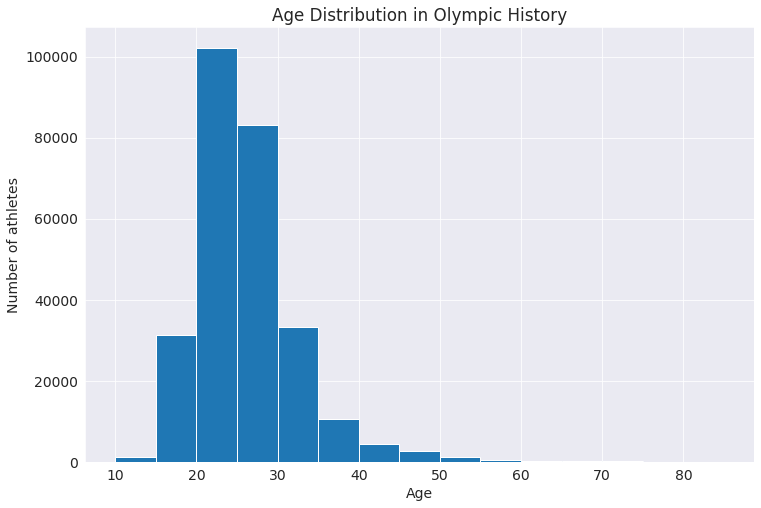

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Age Distribution in Olympic History')
plt.xlabel('Age')
plt.ylabel('Number of athletes')
plt.hist(data_df['Age'], bins=np.arange(10,90, 5));

It turns out that most athletes' in our dataset have an age between 15-35 years. It is somewhat expected as most of the sports requires a high level of physical performance which decreases as one person ages.

**Gender** - Let's explore the gender distribution to see if our dataset is representative of the whole population.

In [ ]:
gender_cnts = data_df['Sex'].value_counts()
gender_cnts

M    196594
F     74522
Name: Sex, dtype: int64

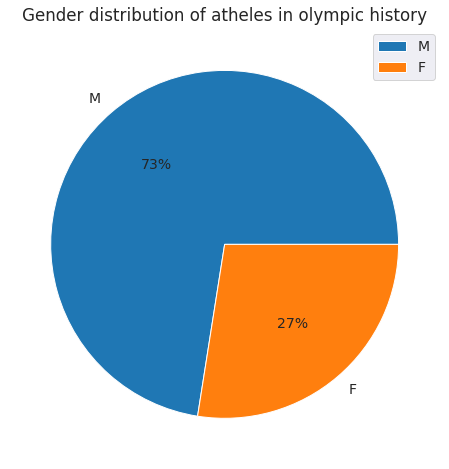

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Gender distribution of atheles in olympic history')
plt.pie(gender_cnts, labels=gender_cnts.index, autopct='%.0f%%');
plt.legend();

It seems that our dataset is not a good representation of the population. It is highly skewed as 73% of the athletes are men.

**Medals** - Let's explore how the granted medals evolves in time.

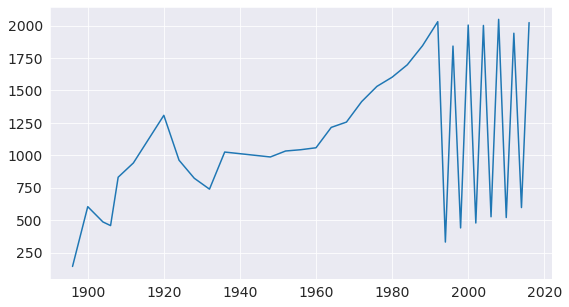

In [ ]:
medal_gpb_df = data_df.groupby(["Year"])["Medal"].count()
plt.plot(medal_gpb_df);

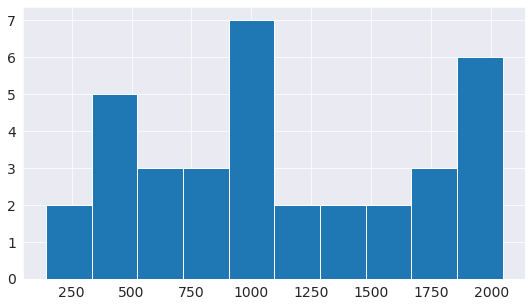

In [ ]:
plt.hist(medal_gpb_df);

It seems that the quantity of granted medals kept increasing until 1994.

**Weight and Height** - Let's explore the weight and height distribution to see if our dataset is representative of the whole population.

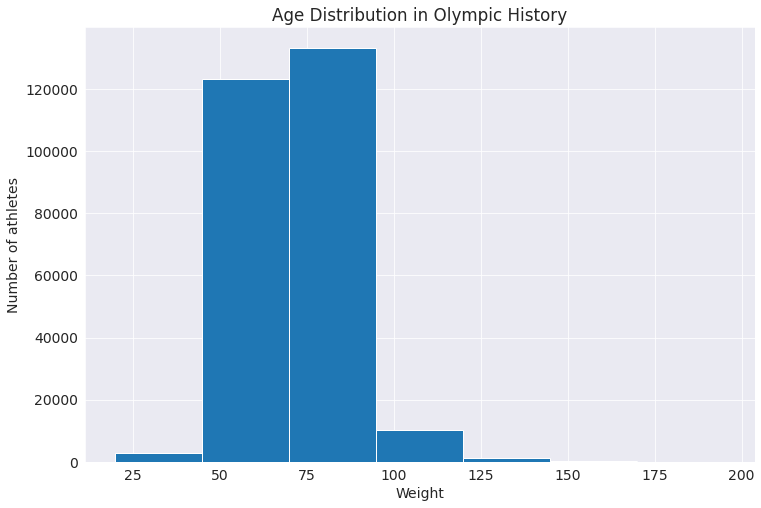

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Age Distribution in Olympic History')
plt.xlabel('Weight')
plt.ylabel('Number of athletes')
plt.hist(data_df['Weight'], bins=np.arange(20, 200, 25));

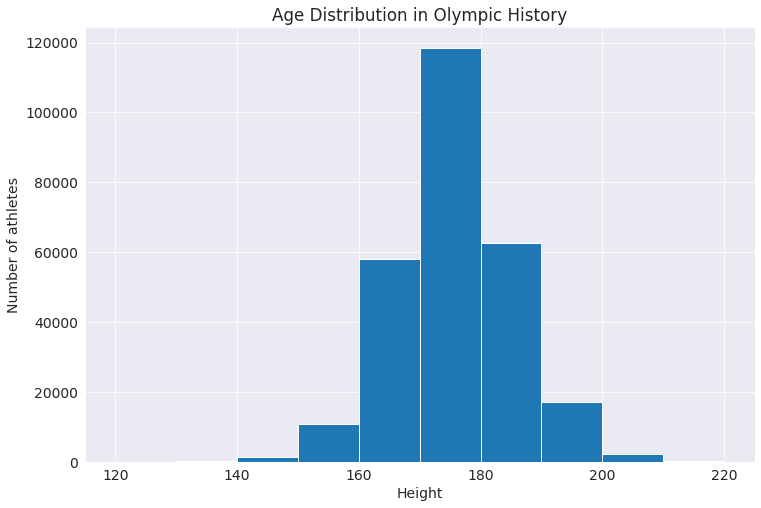

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Age Distribution in Olympic History')
plt.xlabel('Height')
plt.ylabel('Number of athletes')
plt.hist(data_df['Height'], bins=np.arange(120, 230, 10));

It turns out that most of the athletes' in our dataset have a weight between 50-100 kilograms and a height between 170-190 centimeters.

**Body Mass Index (BMI)** - Explore the BMI of the athletes in the Olympic history. Body mass index (BMI) is a measure of body fat based on height and weight. It is often used as an indicator of a person health. To calculate the BMI, we need to convert the Height into meters by dividing it by 100. Then, we can label it. The categories are underweight (under 18.5), normal weight (18.5 to 24.9) , overweight (25 to 29.9), and obese (30 or more).

In [ ]:
data_df['BMI'] = data_df['Weight'] / (data_df['Height']/100)**2
data_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal,BMI,BMI_class
Year,,,,,,,,,,,,,,,,
1992-01-01,1,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,24.691358,Normal weight
2012-01-01,2,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,20.761246,Normal weight
1920-01-01,3,Gunnar Nielsen Aaby,M,24.0,175.402195,70.446834,Denmark,DEN,1920 Summer,Summer,Antwerpen,Football,Football Men's Football,NaN,22.897678,Normal weight
1900-01-01,4,Edgar Lindenau Aabye,M,34.0,182.480000,95.615385,Denmark/Sweden,DEN,1900 Summer,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,28.714234,Overweight
1988-01-01,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,23.959094,Normal weight


In [ ]:
conditions = [
    (data_df['BMI'] < 18.5),
    (data_df['BMI'] >= 18.5) & (data_df['BMI'] < 25),
    (data_df['BMI'] >= 25) & (data_df['BMI'] < 30),
    (data_df['BMI'] >= 30)]
choices = ['Underweight', 'Normal weight', 'Overweight', 'Obese']
data_df['BMI_class'] = np.select(conditions, choices)
data_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal,BMI,BMI_class
Year,,,,,,,,,,,,,,,,
1992-01-01,1,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,24.691358,Normal weight
2012-01-01,2,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,20.761246,Normal weight
1920-01-01,3,Gunnar Nielsen Aaby,M,24.0,175.402195,70.446834,Denmark,DEN,1920 Summer,Summer,Antwerpen,Football,Football Men's Football,NaN,22.897678,Normal weight
1900-01-01,4,Edgar Lindenau Aabye,M,34.0,182.480000,95.615385,Denmark/Sweden,DEN,1900 Summer,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,28.714234,Overweight
1988-01-01,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,23.959094,Normal weight


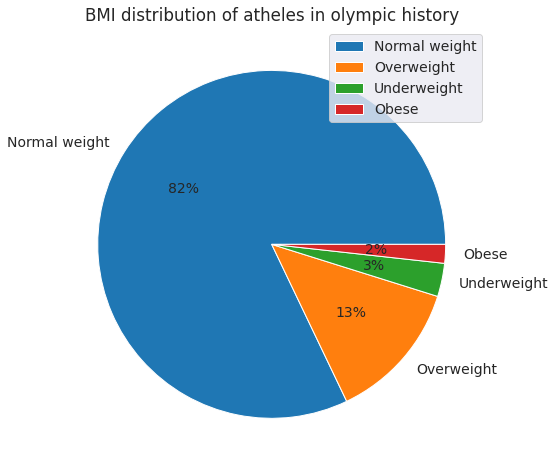

In [ ]:
bmi_cnts = data_df['BMI_class'].value_counts()
plt.figure(figsize=(12,8))
plt.title('BMI distribution of atheles in olympic history')
plt.pie(bmi_cnts, labels=bmi_cnts.index, autopct='%.0f%%');
plt.legend(bmi_cnts.index);

It makes sense for most of the athletes to have a normal weight. In contrast, there are some sports like Weightlifting or Wrestling which requires a lot of weight.

Let us save and upload our work to Jovian before continuing

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/jbcamacho01/analyzing-120-years-of-olympic-history


'https://jovian.ai/jbcamacho01/analyzing-120-years-of-olympic-history'

## Asking and Answering Questions

Now, we have some insights about of dataset. Let's ask some questions about it.



#### Q1: Which are the teams that have earned the most medals?

First, we need to group by number of country (NOC) and aggregate by counting the values, then sort the values and get the 20 countries.

In [ ]:
teams_gbp = data_df.groupby("NOC")["Medal"].count().sort_values(ascending=False)
teams_gbp.head(20)

NOC
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
ITA    1637
SWE    1536
CAN    1352
AUS    1320
RUS    1165
HUN    1135
NED    1040
NOR    1033
GDR    1005
CHN     989
JPN     913
FIN     900
SUI     691
ROU     653
KOR     638
Name: Medal, dtype: int64

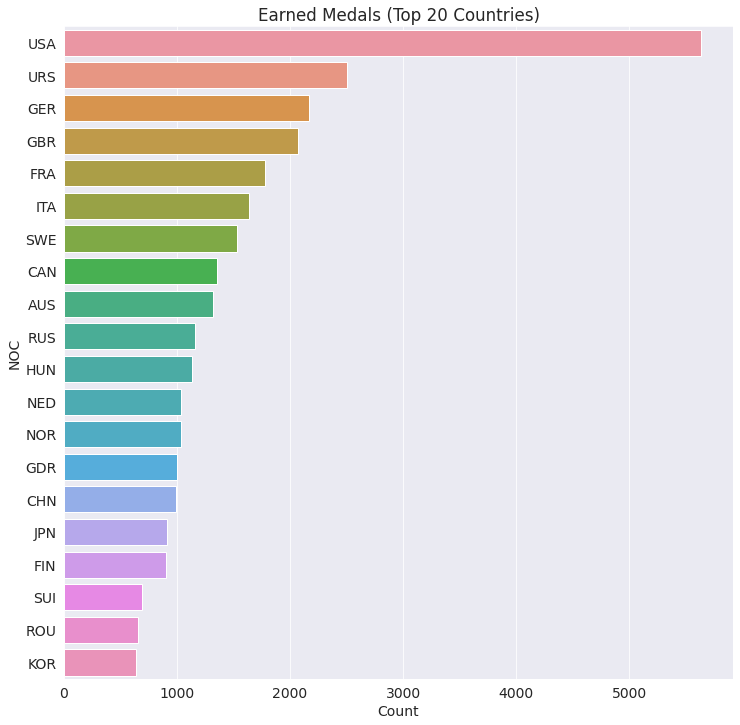

In [ ]:
plt.figure(figsize=(12, 12))
sns.barplot(x=teams_gbp.head(20), y=teams_gbp.head(20).index)
plt.title("Earned Medals (Top 20 Countries)");
plt.xlabel('Count');

The United States has earned most medals over time, just followed by Soviet Union.

#### Q2: Which countries have the highest and lowest average age, weight, and height?

First, we need to group by  number of country (NOC) and aggregate by averaging the values, then sort the values, and lastly get the head and tail rows.

In [ ]:
teams_gbp = data_df.groupby("NOC")["Age", "Height", "Weight"].mean();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


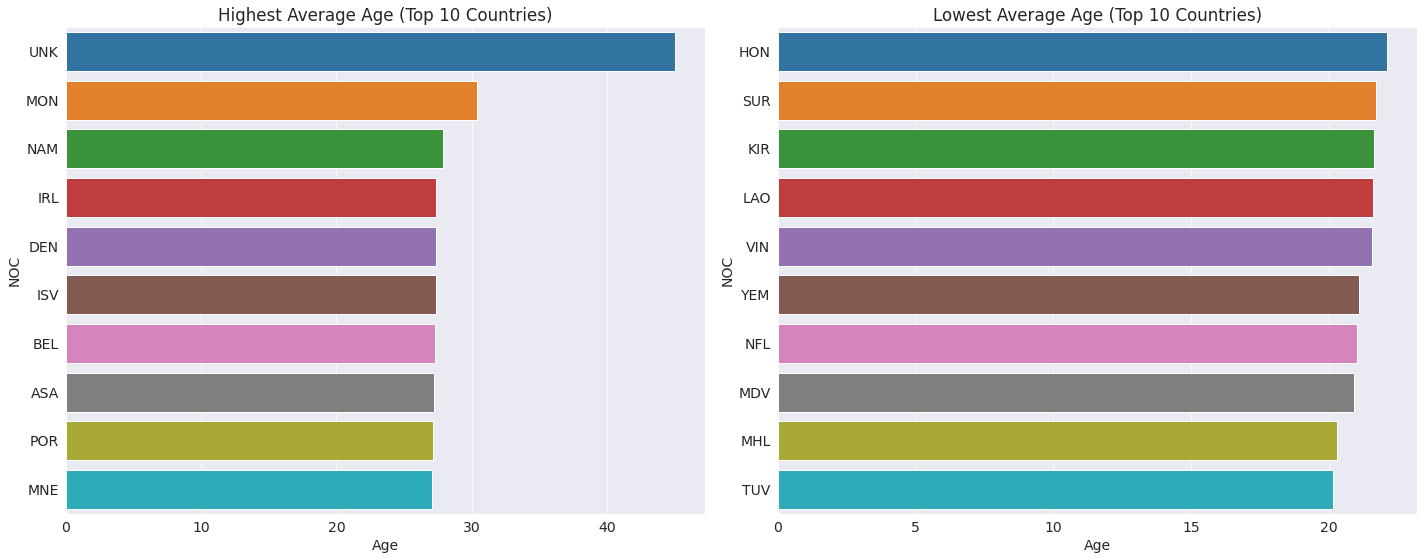

In [ ]:
age_series = teams_gbp["Age"].sort_values(ascending=False)
age_series_highest = age_series.head(10)
age_series_lowest = age_series.tail(10)
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 8))
sns.barplot(x=age_series_highest, y=age_series_highest.index, ax=ax1)
ax1.set_title("Highest Average Age (Top 10 Countries)")
sns.barplot(x=age_series_lowest, y=age_series_lowest.index, ax=ax2)
ax2.set_title("Lowest Average Age (Top 10 Countries)")
f.tight_layout()

For the highest average age, it seems that we have an unknown (UNK) NOC in our dataset, most likely there were some missing records about some athletes. And for the lowest average age, Tuvalu (TUV) seems to have the lowest average with 20.14 years.

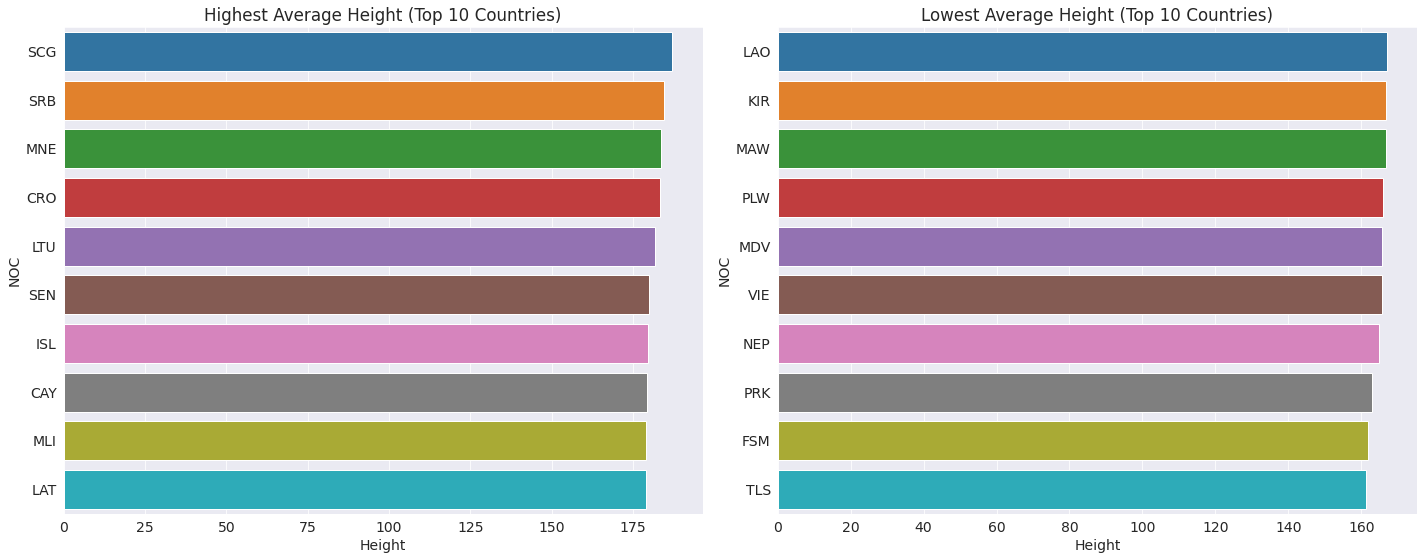

In [ ]:
height_series = teams_gbp["Height"].sort_values(ascending=False)
height_series_highest = height_series.head(10)
height_series_lowest = height_series.tail(10)
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 8))
sns.barplot(x=height_series_highest, y=height_series_highest.index, ax=ax1)
ax1.set_title("Highest Average Height (Top 10 Countries)")
sns.barplot(x=height_series_lowest, y=height_series_lowest.index, ax=ax2)
ax2.set_title("Lowest Average Height (Top 10 Countries)")
f.tight_layout()

For the height, Serbia and Montenegro (SCG) is the highest with an average of 187.07cm and Timor-Leste (TLS) is the lowest with 161.44cm.

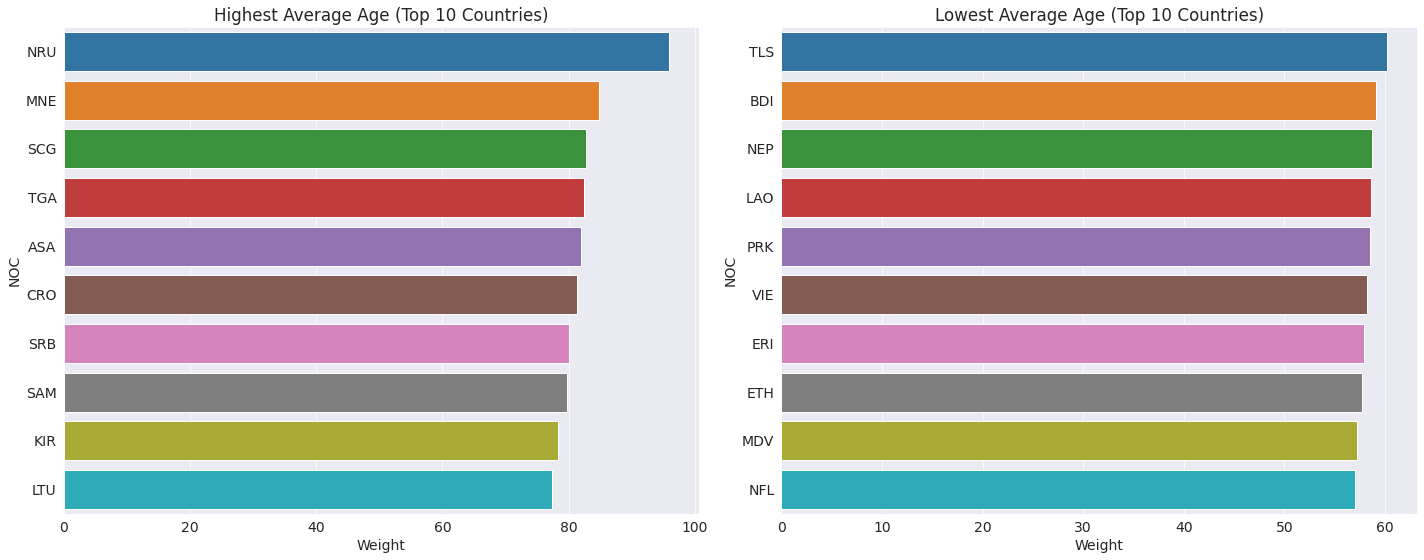

In [ ]:
weight_series = teams_gbp["Weight"].sort_values(ascending=False)
weight_series_highest = weight_series.head(10)
weight_series_lowest = weight_series.tail(10)
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 8))
sns.barplot(x=weight_series_highest, y=weight_series_highest.index, ax=ax1)
ax1.set_title("Highest Average Age (Top 10 Countries)")
sns.barplot(x=weight_series_lowest, y=weight_series_lowest.index, ax=ax2)
ax2.set_title("Lowest Average Age (Top 10 Countries)")
f.tight_layout()

For the weight, Nauru (NRU) is the highest with an average of 95.84kg and Canada Newfoundland (NFL) is the lowest with 57kg.



#### Q3: Which sports have the highest and lowest average age, weight, and height?

First, we need to group by sport and aggregate by averaging the values, then sort the values, and lastly get the head and tail rows.

In [ ]:
teams_gbp = data_df.groupby("Sport")["Age", "Height", "Weight"].mean();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


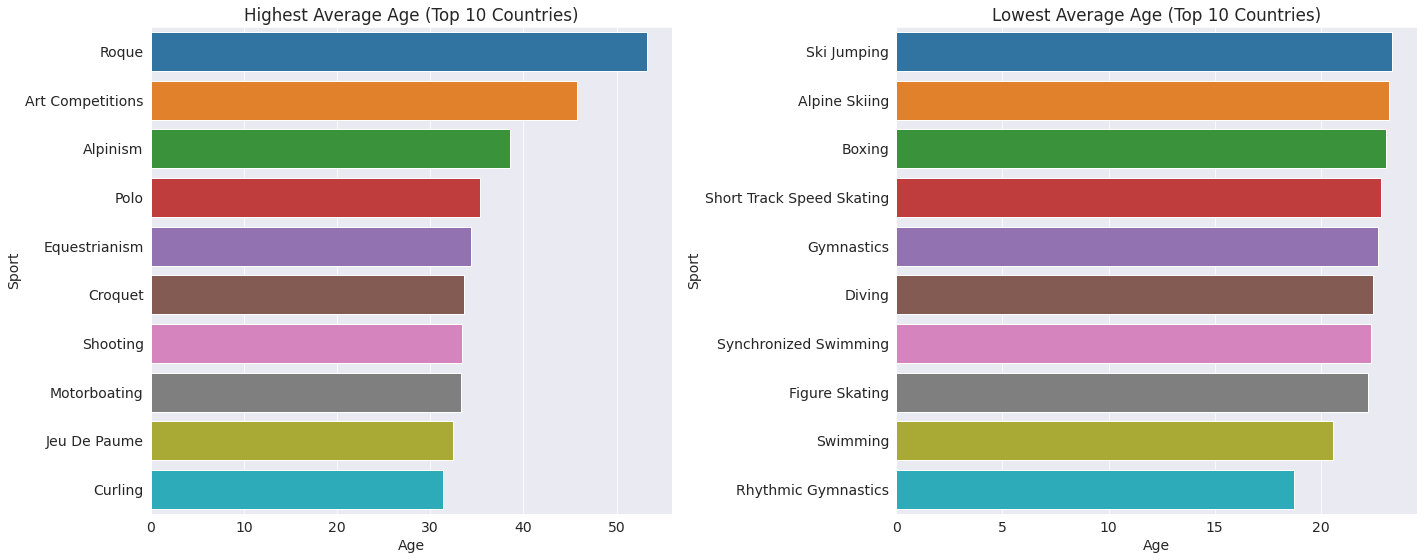

In [ ]:
age_series = teams_gbp["Age"].sort_values(ascending=False)
age_series_highest = age_series.head(10)
age_series_lowest = age_series.tail(10)
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 8))
sns.barplot(x=age_series_highest, y=age_series_highest.index, ax=ax1)
ax1.set_title("Highest Average Age (Top 10 Countries)")
sns.barplot(x=age_series_lowest, y=age_series_lowest.index, ax=ax2)
ax2.set_title("Lowest Average Age (Top 10 Countries)")
f.tight_layout()

It seems right for Roque and Art Competitions to be the highest, regarding age, the sports itself are not physically taxing. It appears that Rhythmic Gymnastics have the lowest average age.

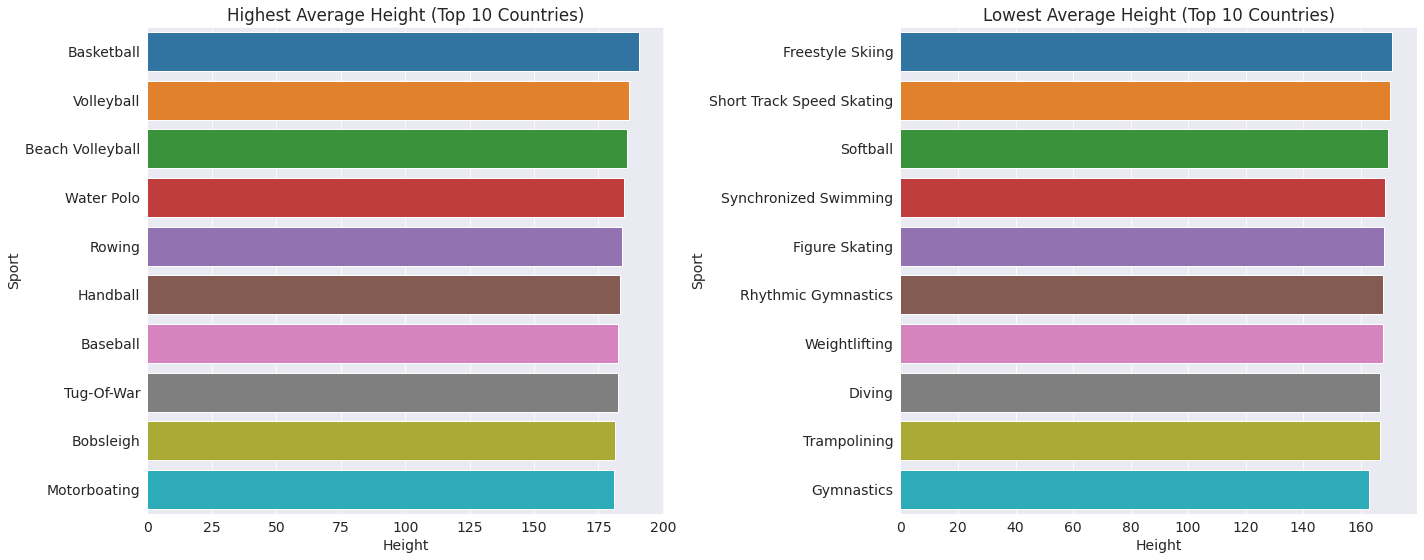

In [ ]:
height_series = teams_gbp["Height"].sort_values(ascending=False)
height_series_highest = height_series.head(10)
height_series_lowest = height_series.tail(10)
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 8))
sns.barplot(x=height_series_highest, y=height_series_highest.index, ax=ax1)
ax1.set_title("Highest Average Height (Top 10 Countries)")
sns.barplot(x=height_series_lowest, y=height_series_lowest.index, ax=ax2)
ax2.set_title("Lowest Average Height (Top 10 Countries)")
f.tight_layout()

Likewise, it appropriate for Basketball and Volleyball to have the highest average height for obvious reasons. Gymnastics tend to have low statures, so it's not surprising that for it to have the lowest average height.

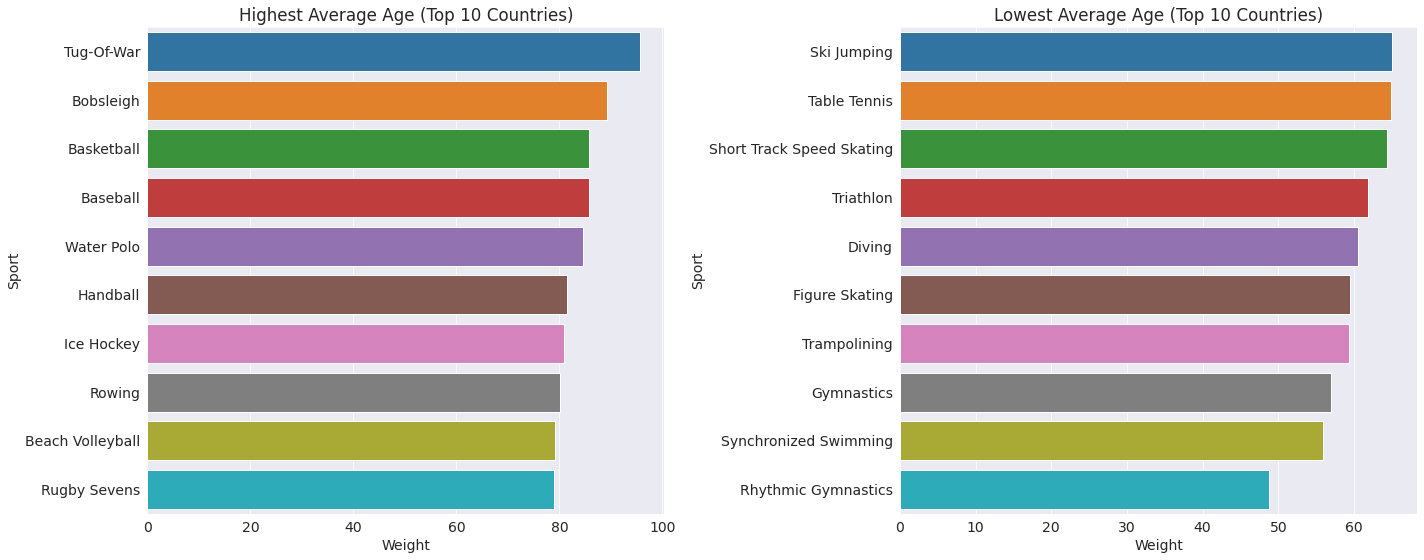

In [ ]:
weight_series = teams_gbp["Weight"].sort_values(ascending=False)
weight_series_highest = weight_series.head(10)
weight_series_lowest = weight_series.tail(10)
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 8))
sns.barplot(x=weight_series_highest, y=weight_series_highest.index, ax=ax1)
ax1.set_title("Highest Average Age (Top 10 Countries)")
sns.barplot(x=weight_series_lowest, y=weight_series_lowest.index, ax=ax2)
ax2.set_title("Lowest Average Age (Top 10 Countries)")
f.tight_layout()

Tug-Of-War and Rhythmic Gymnastics have the highest and lowest average weight, respectively. It is interesting that Gymnastics appears in all the tops for the lowest.

#### Q4: Which BMI category has the most athletes? Does this differ if we filter by gender?

First, we need to group by BMI_class and Sex, then aggregate by counting the values, and finally reset the index.

In [ ]:
bmi_df = data_df.groupby(["BMI_class", "Sex"])['ID'].aggregate(['count']).reset_index()
bmi_df.head()

,BMI_class,Sex,count
0,Normal weight,F,64210
1,Normal weight,M,158366
2,Obese,F,532
3,Obese,M,4198
4,Overweight,F,3204


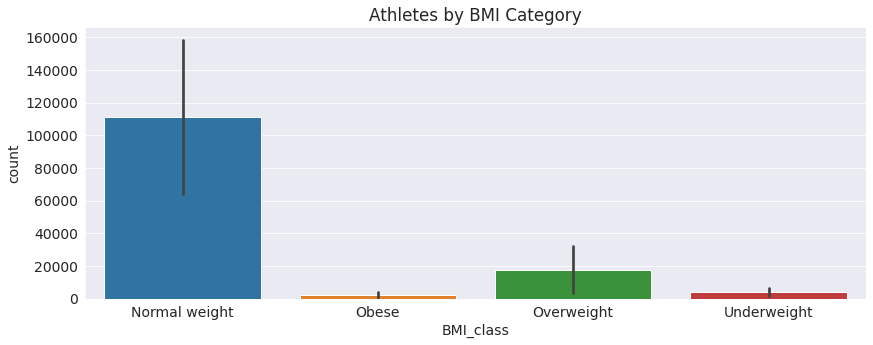

In [ ]:
plt.figure(figsize=(14, 5))
sns.barplot(data=bmi_df,
            x="BMI_class",
            y="count"
           )

plt.title("Athletes by BMI Category")
plt.show()

It seems that normal-weight athletes are the predominant participants in Olympics. Let's check how this changes after filtering by sex.

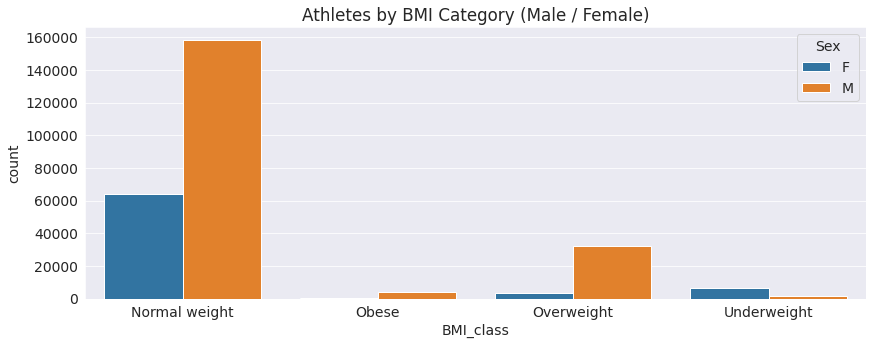

In [ ]:
plt.figure(figsize=(14, 5))
sns.barplot(data=bmi_df,
            x="BMI_class",
            y="count",
            hue="Sex",
           )

plt.title("Athletes by BMI Category (Male / Female)")
plt.show()

Unsurprisingly, there seems to be more males in overall categories, except for underweight. Another fact is that there are not female athletes within the obese category.

#### Q5: Which BMI category has earned the most medals?

First, we need to group by BMI_class and Medal, then aggregate by counting the values, and finally reset the index.

In [ ]:
t = data_df.groupby(["BMI_class", "Medal"]).count().reset_index()
t.head()

,BMI_class,Medal,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,BMI
0,Normal weight,Bronze,10549,10549,10549,10549,10549,10549,10549,10549,10549,10549,10549,10549,10549,10549
1,Normal weight,Gold,10514,10514,10514,10514,10514,10514,10514,10514,10514,10514,10514,10514,10514,10514
2,Normal weight,Silver,10342,10342,10342,10342,10342,10342,10342,10342,10342,10342,10342,10342,10342,10342
3,Obese,Bronze,249,249,249,249,249,249,249,249,249,249,249,249,249,249
4,Obese,Gold,258,258,258,258,258,258,258,258,258,258,258,258,258,258


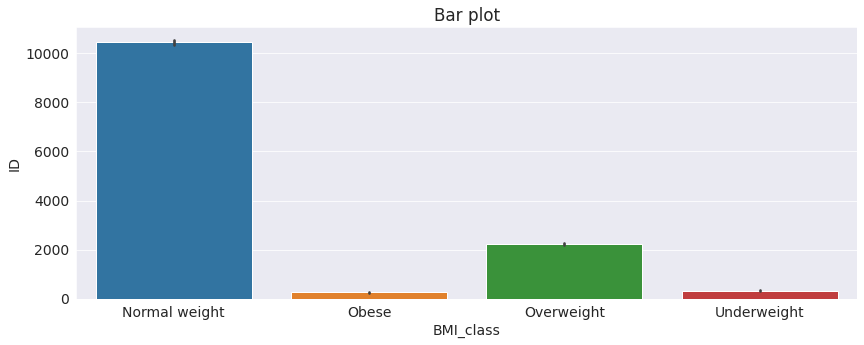

In [ ]:
plt.figure(figsize=(14, 5))
sns.barplot(data=t,
            x="BMI_class",
            y="ID"
           )

plt.title("Bar plot")
plt.show()

It seems that normal weight athletes have earned the most medals. Let's check how medal types are distributed.

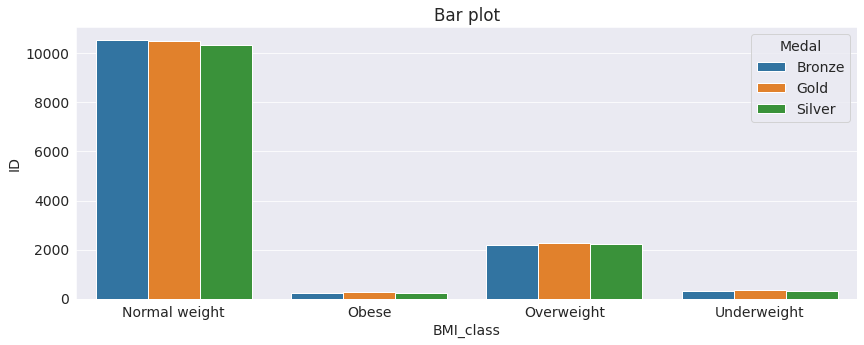

In [ ]:
plt.figure(figsize=(14, 5))
sns.barplot(data=t,
            x="BMI_class",
            y="ID",
            hue="Medal",
           )

plt.title("Bar plot")
plt.show()

Let us save and upload our work to Jovian before continuing.

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/jbcamacho01/analyzing-120-years-of-olympic-history


'https://jovian.ai/jbcamacho01/analyzing-120-years-of-olympic-history'

## Inferences and Conclusion

We have obtained valuable insight from the dataset. We summarize them as follows:

- Most of the athletes' in our dataset have an age between 15-35 years.

- 73% of the athletes are men.

- The quantity of granted medals kept increasing until 1994.

- Most of the athletes' in our dataset have a weight between 50-100 kilograms.

- Most of the athletes' in our dataset have a height between 170-190 centimeters.

- 82% of the athletes have a normal weight based on the BMI metric.

- The United States has earned most medals over time, just followed by the Soviet Union.

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/jbcamacho01/analyzing-120-years-of-olympic-history


'https://jovian.ai/jbcamacho01/analyzing-120-years-of-olympic-history'

## References and Future Work

We would like to add some points for future work in order to improve the above analysis:

- Analyze the winter and summer games separately to see if our previous inferences change.
- Integrate the `noc_regions.csv` dataset into the analysis by merging it with `athlete_events.csv`.
- Perform analyzes for individual athletes.
- Check if there is some correlation between number of medals won and the physical characteristics of the athletes.
- Review if there are significant differences between different teams within the same country.

Check out the following resources to learn more about the dataset and tools used in this notebook:

- 120 years of Olympic history: https://www.kaggle.com/code/heesoo37/olympic-history-data-a-thorough-analysis/report
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
- `opendatasets` Python library: https://github.com/JovianML/opendatasets

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/jbcamacho01/analyzing-120-years-of-olympic-history


'https://jovian.ai/jbcamacho01/analyzing-120-years-of-olympic-history'